In [366]:
import project_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (train_test_split, 
                                     RandomizedSearchCV, 
                                     cross_val_score,
                                     RepeatedStratifiedKFold
                                    )
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.ensemble import (RandomForestRegressor, 
                              RandomForestClassifier
                             )
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             precision_score, 
                             recall_score, 
                             #roc_auc_score, 
                             #roc_curve, 
                             f1_score
                            )
from sklearn.preprocessing import (OneHotEncoder, 
                                   OrdinalEncoder
                                  )
from sklearn.compose import make_column_transformer
from pprint import pprint
from sklearn.pipeline import make_pipeline
from numpy import (mean, 
                   std
                  )
#from numpy import std
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from scipy.stats import mode as sc_mode
import os
from IPython.display import display, Image 
#from funct import *

pd.set_option('display.max_columns', None)

%matplotlib inline

In [367]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [368]:
train_all = pd.read_pickle('data/train_raw.pkl')

In [369]:
train_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [370]:
# features from random forest based on NAmes date
features = ['Neighborhood', 'FullBath', 'OverallQual', 'ExterQual',
            'GarageCars', 'YearBuilt', 'KitchenQual', 'TotRmsAbvGrd', 'GrLivArea',
           'SalePrice']

In [371]:
x_feat = train_all[features]

In [372]:
x_feat.shape

(1460, 10)

In [373]:
x_feat.describe()

,FullBath,OverallQual,GarageCars,YearBuilt,TotRmsAbvGrd,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.565068,6.099315,1.767123,1971.267808,6.517808,1515.463699,180921.195890
std,0.550916,1.382997,0.747315,30.202904,1.625393,525.480383,79442.502883
min,0.000000,1.000000,0.000000,1872.000000,2.000000,334.000000,34900.000000
25%,1.000000,5.000000,1.000000,1954.000000,5.000000,1129.500000,129975.000000
50%,2.000000,6.000000,2.000000,1973.000000,6.000000,1464.000000,163000.000000
75%,2.000000,7.000000,2.000000,2000.000000,7.000000,1776.750000,214000.000000
max,3.000000,10.000000,4.000000,2010.000000,14.000000,5642.000000,755000.000000


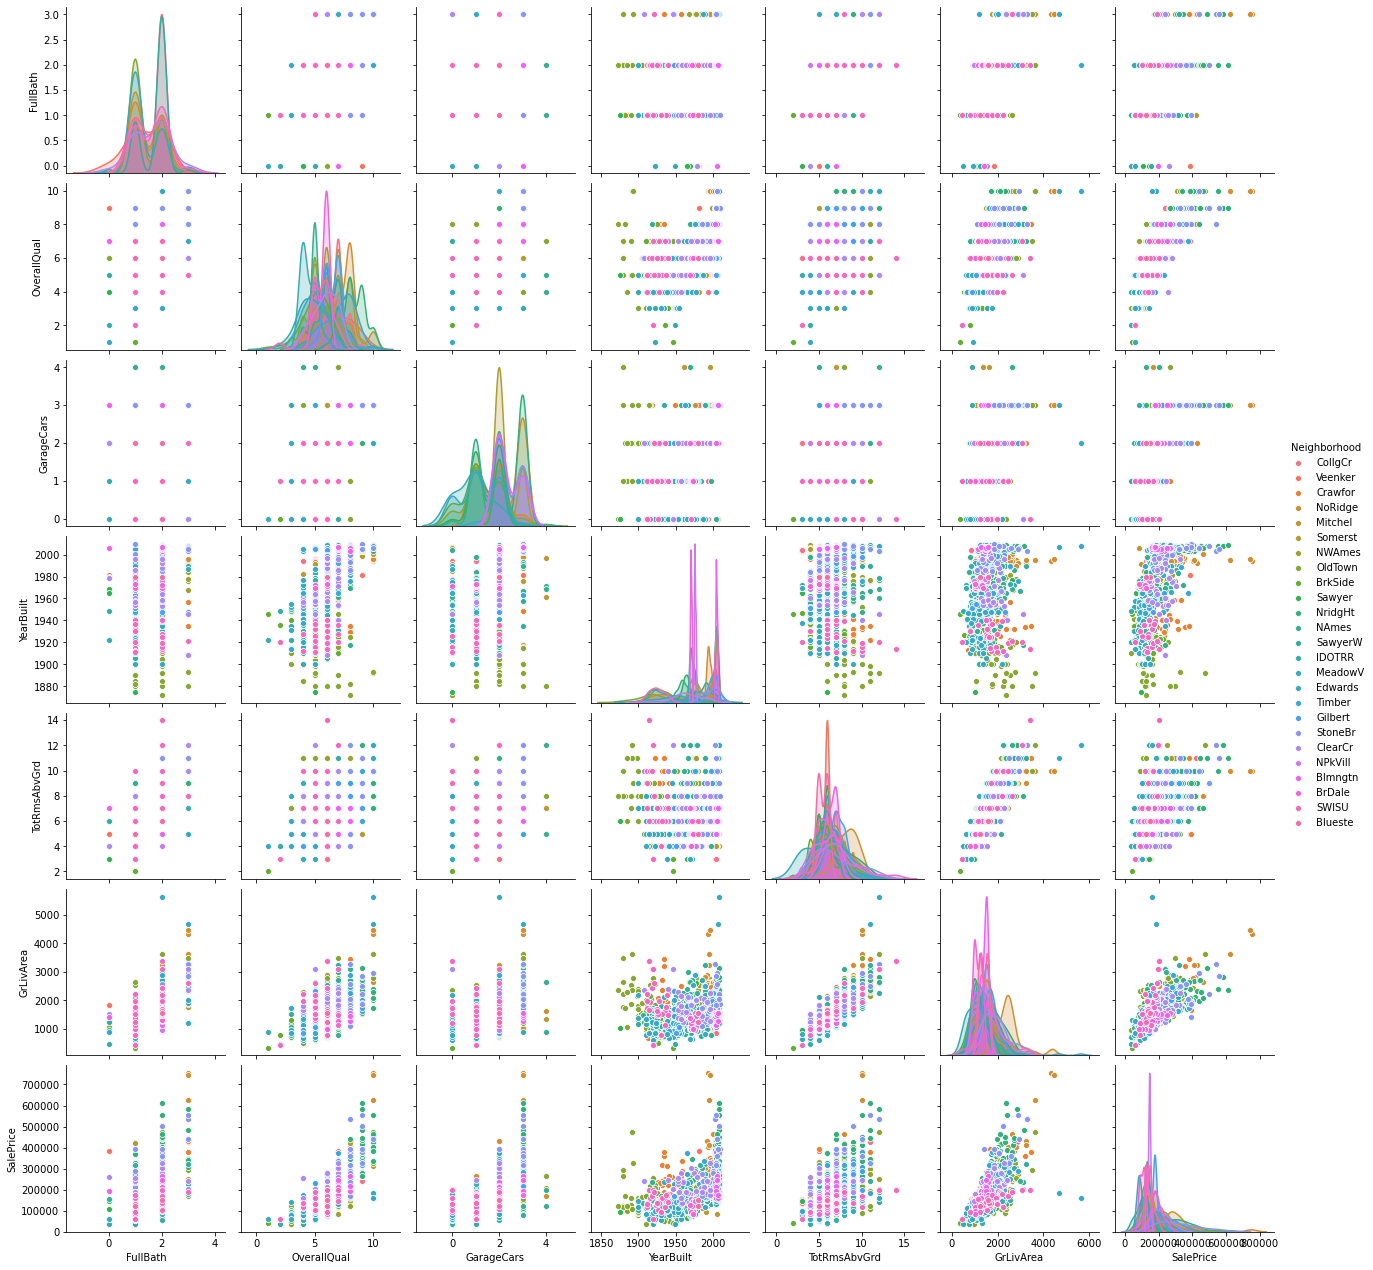

In [379]:
sns.pairplot(x_feat, hue='Neighborhood')
plt.savefig('images/pair_plot_sns.png')
plt.show()

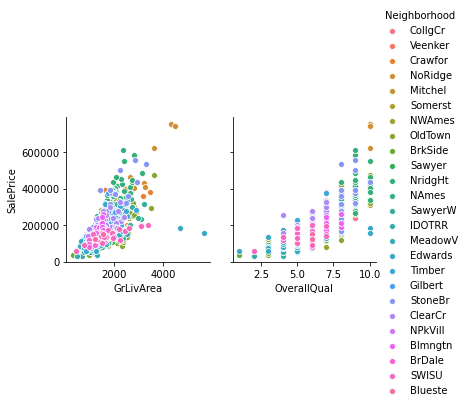

In [375]:
sns.pairplot(x_feat, x_vars=['GrLivArea', 'OverallQual'], y_vars=['SalePrice'], hue='Neighborhood')

In [376]:
x_feat.corr()

,FullBath,OverallQual,GarageCars,YearBuilt,TotRmsAbvGrd,GrLivArea,SalePrice
FullBath,1.000000,0.550600,0.469672,0.468271,0.554784,0.630012,0.560664
OverallQual,0.550600,1.000000,0.600671,0.572323,0.427452,0.593007,0.790982
GarageCars,0.469672,0.600671,1.000000,0.537850,0.362289,0.467247,0.640409
YearBuilt,0.468271,0.572323,0.537850,1.000000,0.095589,0.199010,0.522897
TotRmsAbvGrd,0.554784,0.427452,0.362289,0.095589,1.000000,0.825489,0.533723
GrLivArea,0.630012,0.593007,0.467247,0.199010,0.825489,1.000000,0.708624
SalePrice,0.560664,0.790982,0.640409,0.522897,0.533723,0.708624,1.000000


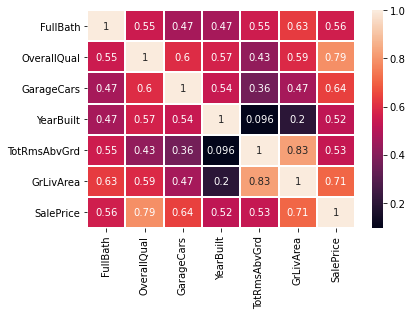

In [377]:
sns.heatmap(x_feat.corr(), annot=True, lw=1)
plt.savefig('images/feat_corr.png')
plt.show()

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

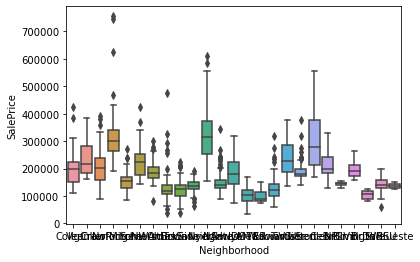

In [56]:
sns.boxplot(y='SalePrice', x='Neighborhood', data=x_feat)#



In [59]:

           
X=x_feat[['Neighborhood', 'FullBath', 'OverallQual', 'ExterQual',
            'GarageCars', 'YearBuilt', 'KitchenQual', 
 'TotRmsAbvGrd', 'GrLivArea']]
X = pd.get_dummies(data=X, drop_first=True)

In [61]:
Y = x_feat['SalePrice']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 36)
(292, 36)
(1168,)
(292,)


In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [68]:
print(model.intercept_)

-505038.36261747073


In [69]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
FullBath,489.121108
OverallQual,13110.940734
GarageCars,12041.067526
YearBuilt,294.189130
TotRmsAbvGrd,-240.858509
GrLivArea,47.676246
Neighborhood_Blueste,-26955.035173
Neighborhood_BrDale,-26070.627089
Neighborhood_BrkSide,11123.021352
Neighborhood_ClearCr,36089.708590


In [70]:
predictions = model.predict(X_test)

array([193363.7598812 , 257056.81367466, 115368.8760954 , 433680.83808643,
       186063.89579708,  74993.63862456, 168624.46778953, 209182.59264602,
       449393.41335344, 117939.17772709, 132248.53540172, 124749.17120982,
       198127.47927798, 186401.98374333, 186513.84929665, 162482.67709013,
       219263.30704755, 112884.06661569, 198903.7311426 , 330246.31528004,
       100813.32619283, 226858.11447326, 123582.12229576, 139205.22271337,
       138975.25145754, 145050.81566124, 216205.25380173, 128118.98223151,
       123497.12883422, 209717.53812295, 101342.27478006, 156573.40420352,
       294971.09206387, 200363.6874694 ,  99512.98813155, 252962.78769816,
       215564.72763204, 220082.37454833, 184770.13395982, 139838.3949702 ,
       115795.06345726, 318279.4446171 , 211064.64460051, 204072.34497634,
       193106.14213115, 115244.59762556, 226352.37807148, 208007.77090604,
       112980.78269997, 124826.10204064, 121000.24743116, 412833.96002906,
        38666.01532556, 3

<AxesSubplot:xlabel='SalePrice'>

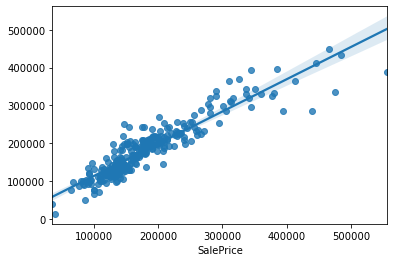

In [75]:
sns.regplot(y_test,predictions)

In [76]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     139.5
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        09:21:05   Log-Likelihood:                -13850.
No. Observations:                1168   AIC:                         2.777e+04
Df Residuals:                    1131   BIC:                         2.796e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -5.05e+05 

In [134]:
train_all = pd.read_pickle('data/train_raw.pkl')
features=['Neighborhood', 'SalePrice','OverallQual', 'Heating',
            'BsmtQual', 'HouseStyle', 'KitchenQual', 'YearBuilt',
 'TotRmsAbvGrd', 'OverallCond']
x_feat = train_all


x_feat_Neigh = x_feat.loc[x_feat['Neighborhood'].isin(keep_)]#['NAmes', 'OldTown'])]#'NAmes']
x_feat_Neigh

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1962,1962,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,Rec,593,Unf,0,595,1188,GasA,TA,Y,SBrkr,1188,0,0,1188,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1962.0,Unf,1,312,TA,TA,P,261,39,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.25e-58
Time:                        10:28:29   Log-Likelihood:                -3505.1
No. Observations:                 304   AIC:                             7048.
Df Residuals:                     285   BIC:                             7119.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.368e+04 

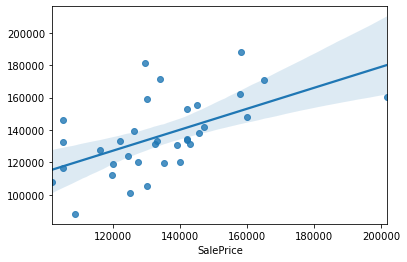

In [125]:
X=x_feat_Neigh[['Neighborhood', 'BedroomAbvGr', 'Heating',
            'BsmtQual', 'HouseStyle', 'KitchenAbvGr', '1stFlrSF',
 'TotRmsAbvGrd', 'OverallCond']]
Y = x_feat_Neigh['SalePrice']
X = pd.get_dummies(data=X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=22)
model = LinearRegression()
model.fit(X_train,y_train)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
predictions = model.predict(X_test)
sns.regplot(y_test,predictions)
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [105]:
train_all = pd.read_pickle('data/train_raw.pkl')
features=['SalePrice','OverallQual', 'Heating',
            'BsmtQual', 'HouseStyle', 'KitchenQual', 'YearBuilt',
 'TotRmsAbvGrd', 'OverallCond']
x_feat = train_all

(array([ 22., 109., 333., 337., 261., 153.,  87.,  53.,  46.,  18.,  17.,
         10.,   4.,   2.,   1.,   3.,   1.,   1.,   0.,   0.,   2.]),
 array([ 34900.        ,  69190.47619048, 103480.95238095, 137771.42857143,
        172061.9047619 , 206352.38095238, 240642.85714286, 274933.33333333,
        309223.80952381, 343514.28571429, 377804.76190476, 412095.23809524,
        446385.71428571, 480676.19047619, 514966.66666667, 549257.14285714,
        583547.61904762, 617838.0952381 , 652128.57142857, 686419.04761905,
        720709.52380952, 755000.        ]),
 <BarContainer object of 21 artists>)

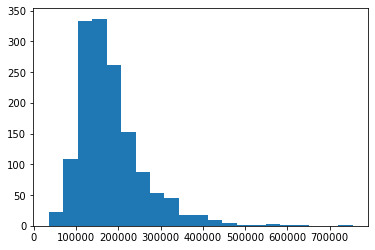

In [110]:
plt.hist(x_feat['SalePrice'], bins = 21)

Text(0.5, 1.0, 'Density Plot of Final Grades by Location')

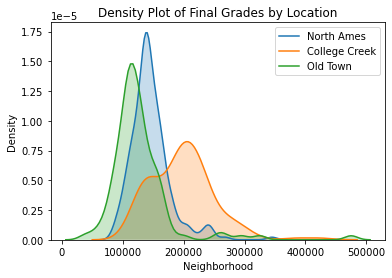

In [117]:
import seaborn as sns
# Make one plot for each different location
sns.kdeplot(x_feat.loc[x_feat['Neighborhood'] == 'NAmes', 'SalePrice'], 
            label = 'North Ames', shade = True)
sns.kdeplot(x_feat.loc[x_feat['Neighborhood'] == 'CollgCr', 'SalePrice'], 
            label = 'College Creek', shade = True)
sns.kdeplot(x_feat.loc[x_feat['Neighborhood'] == 'OldTown', 'SalePrice'], 
            label = 'Old Town', shade = True)
# Add labeling
plt.xlabel('Neighborhood')
plt.ylabel('Density')
plt.title('Density Plot of Sale Price by Neighborhood')

CollgCr 150


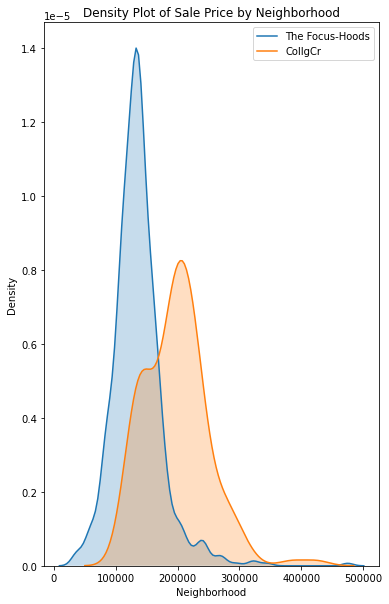

Veenker 11


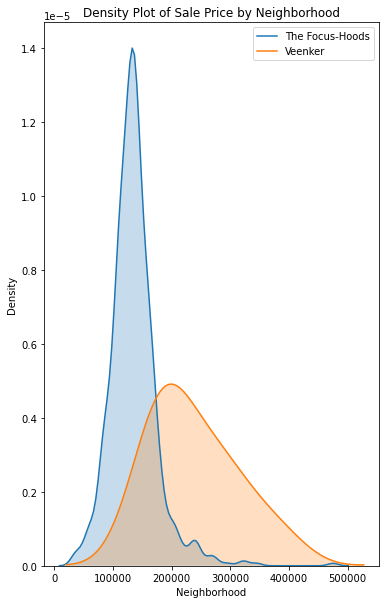

Crawfor 51


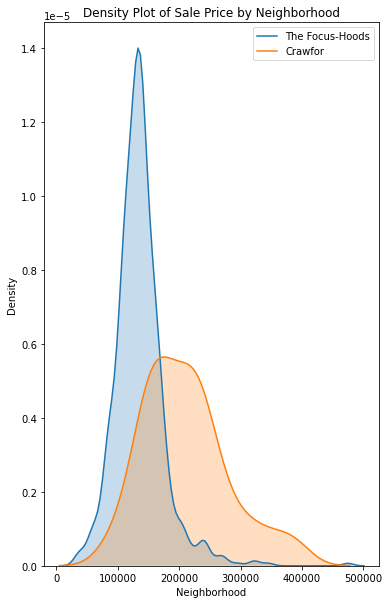

NoRidge 41


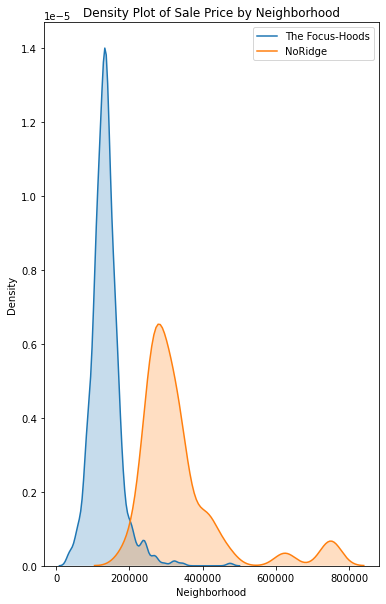

Somerst 86


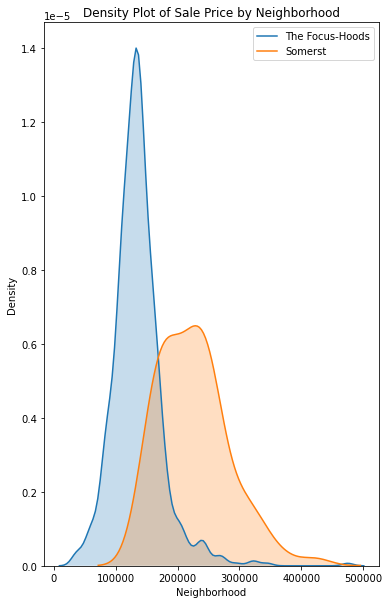

NWAmes 73


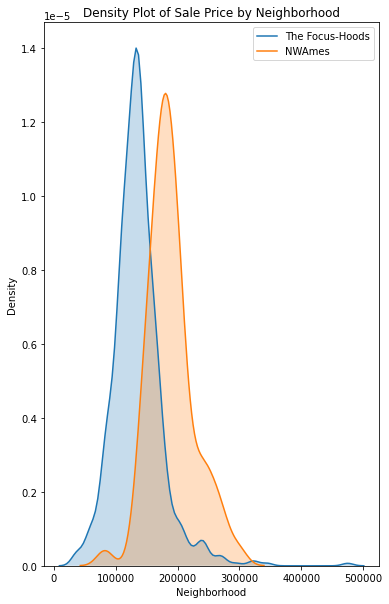

NridgHt 77


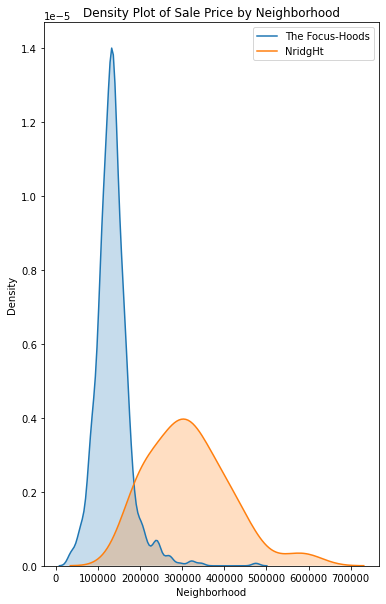

SawyerW 59


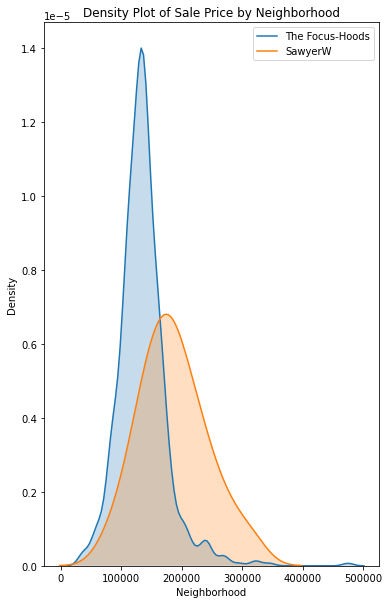

MeadowV 17


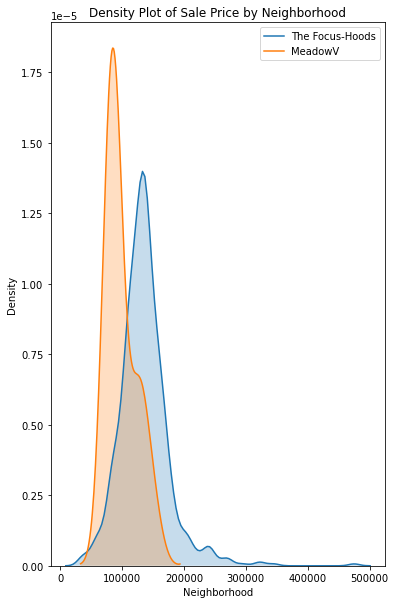

Timber 38


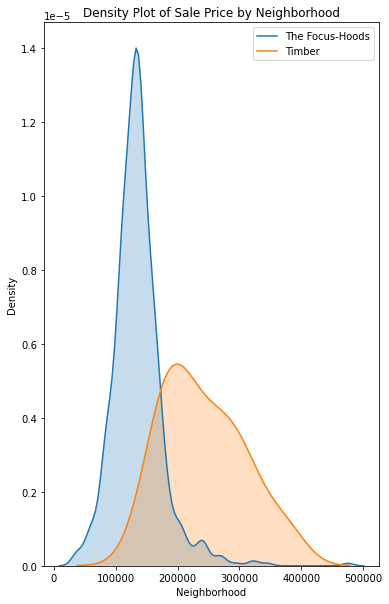

Gilbert 79


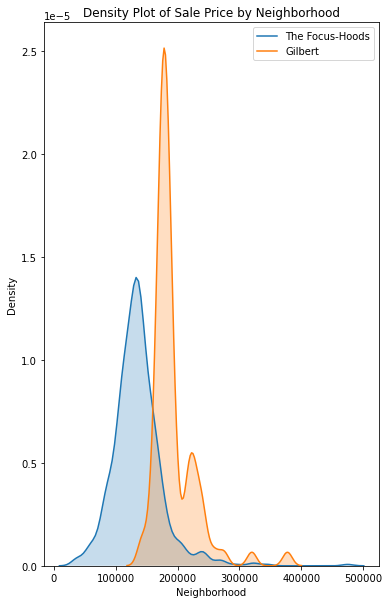

StoneBr 25


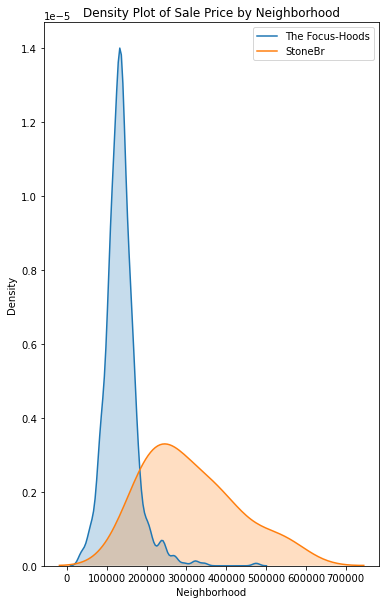

ClearCr 28


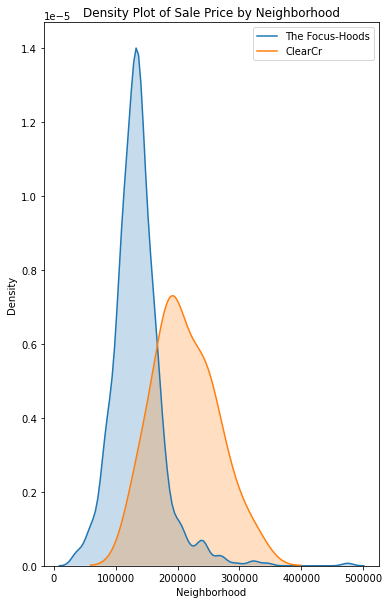

NPkVill 9


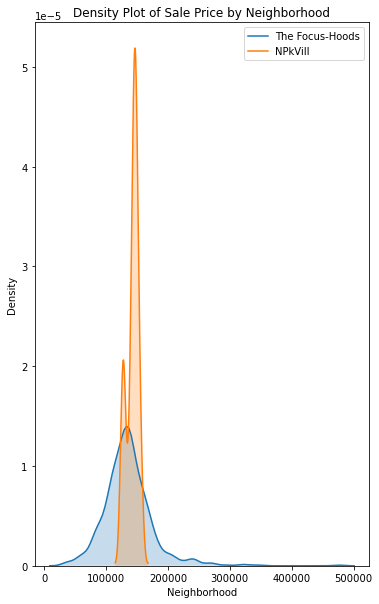

Blmngtn 17


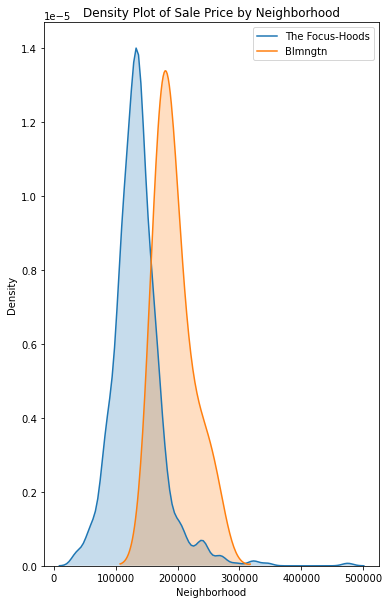

BrDale 16


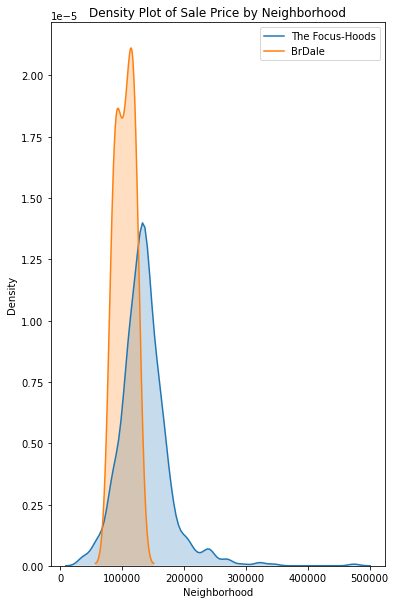

Blueste 2


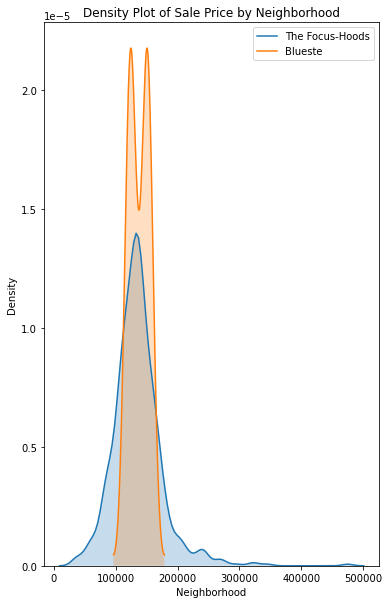

In [358]:
keep_ = ['NAmes', 'OldTown', 'Sawyer', 'BrkSide', 'Mitchel', 'IDOTRR', 'SWISU', 'Edwards']
import seaborn as sns
# Make one plot for each different location
for neigh_ in x_feat['Neighborhood'].unique():
    if neigh_ not in keep_:
        print(neigh_, (x_feat.loc[x_feat['Neighborhood']==neigh_].shape[0]))
        sns.kdeplot(x_feat.loc[x_feat['Neighborhood'].isin(keep_), 'SalePrice'], 
                label = "The Focus-Hoods", shade = True)
        sns.kdeplot(x_feat.loc[x_feat['Neighborhood'] == neigh_, 'SalePrice'], 
                label = neigh_, shade = True)
        # Add labeling
        file_name_ = 'images/Density_plot_' + neigh_ + '.png'
        plt.xlabel('Neighborhood')
        plt.ylabel('Density')
        plt.title('Density Plot of Sale Price by Neighborhood')
        plt.savefig(file_name_)
        plt.show()



In [139]:
feat_to_keep = ['TotRmsAbvGrd', 'MasVnrType', 'GarageType', 
                'GarageFinish', 'Fireplaces', 'OverallQual', 
                'GrLivArea', 'Heating', 'GarageCars', 
                'FullBath','Neighborhood']

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     47.83
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          1.78e-112
Time:                        11:08:38   Log-Likelihood:                -5271.7
No. Observations:                 464   AIC:                         1.060e+04
Df Residuals:                     436   BIC:                         1.072e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.427e+04 

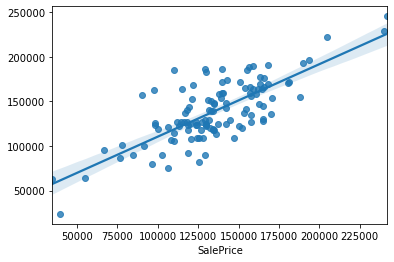

In [140]:
X=x_feat_Neigh[feat_to_keep]
Y = x_feat_Neigh['SalePrice']
X = pd.get_dummies(data=X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
model = LinearRegression()
model.fit(X_train,y_train)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
predictions = model.predict(X_test)
sns.regplot(y_test,predictions)
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [261]:
feat_to_keep = ['TotRmsAbvGrd',#, 'MasVnrType',# 'GarageType', 'FullBath',
                'Fireplaces', 'OverallQual', 
                'GrLivArea', 'GarageCars', 
                'Neighborhood']

In [281]:
def lr_model(df, neigh_, feat_keep):
    X=df.loc[df['Neighborhood'].isin(neigh_)][feat_keep]
    Y = df.loc[df['Neighborhood'].isin(neigh_)]['SalePrice']
    X = pd.get_dummies(data=X, drop_first=True)
    #X = X.drop(['GarageType_CarPort', 'GarageFinish_RFn', 'Heating_GasA'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
    
    model = LinearRegression()
    model.fit(X_train,y_train)

    coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
    predictions = model.predict(X_test)
    sns.regplot(y_test,predictions)
    X_train_Sm= sm.add_constant(X_train)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.OLS(y_train,X_train_Sm).fit()
    print(ls.summary())
    return X_train.sort_values('OverallQual'), model

In [282]:
train.iloc[916]

MSZoning_FV                      0
MSZoning_RH                      0
MSZoning_RL                      1
MSZoning_RM                      0
LotArea_(12799.667, 215245.0]    0
                                ..
MoSold_9                         0
YrSold_2007                      0
YrSold_2008                      0
YrSold_2009                      0
YrSold_2010                      0
Name: 370, Length: 194, dtype: uint8

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     106.6
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          5.28e-118
Time:                        13:32:16   Log-Likelihood:                -5294.3
No. Observations:                 464   AIC:                         1.061e+04
Df Residuals:                     452   BIC:                         1.066e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2297.1387 

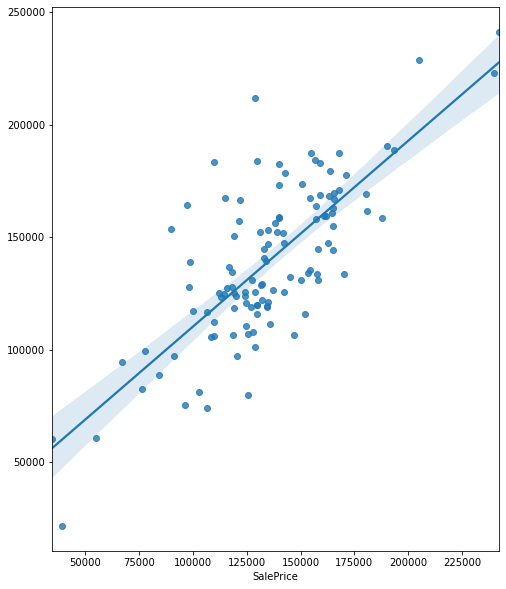

In [283]:

x_vals, mod_ = lr_model(x_feat, keep_, feat_to_keep)

In [341]:
new_vals = x_vals.loc[(x_vals['OverallQual']<=4)]# or x_vals['OverallQual']==3)]
result = train_all.iloc[list(new_vals
                                 .index
                                 .values
                                 .tolist())][['Neighborhood', 'OverallQual', 'SalePrice']]
#train_all.iloc[train_all.loc[new_vals]]
for qual_ in [7,8,9]: 
    field_ = '_Est_Price_qual_' + str(qual_)
    new_vals['OverallQual']= qual_
    y_vals = mod_.predict(new_vals)
#     result = train_all.iloc[list(new_vals
#                                  .index
#                                  .values
#                                  .tolist())][['SalePrice', 'Neighborhood']]
    result['_Est_Price_qual_' + str(qual_)]=y_vals.round(-3).astype('int64')

In [340]:
result

,Neighborhood,SalePrice,OverallQual,_Est_Price_qual_7,_Est_Price_qual_8,_Est_Price_qual_9
916,IDOTRR,35311,2,104000,119000,134000
1100,SWISU,60000,2,112000,127000,142000
636,BrkSide,60000,2,136000,151000,166000
736,NAmes,93500,3,160000,175000,190000
968,OldTown,37900,3,115000,130000,145000
...,...,...,...,...,...,...
1218,BrkSide,80500,4,134000,149000,164000
867,Sawyer,129000,4,165000,180000,195000
1130,SWISU,135000,4,197000,212000,227000
479,OldTown,89471,4,139000,154000,169000


In [225]:
ls.pvalues

const                   5.479097e-01
TotRmsAbvGrd            1.858270e-02
Fireplaces              1.219813e-06
OverallQual             5.817547e-27
GrLivArea               3.296778e-20
GarageCars              3.772337e-07
FullBath                5.824398e-01
MasVnrType_BrkFace      1.126640e-01
MasVnrType_None         4.776309e-02
MasVnrType_Stone        1.779778e-01
GarageType_Attchd       5.058514e-02
GarageType_Basment      5.156726e-02
GarageType_BuiltIn      6.139486e-01
GarageType_CarPort      9.269536e-01
GarageType_Detchd       1.126520e-01
GarageFinish_RFn        1.944511e-01
GarageFinish_Unf        2.859475e-03
Heating_GasA            9.954313e-01
Heating_GasW            6.766836e-01
Heating_Grav            5.739266e-01
Heating_OthW            3.592207e-02
Heating_Wall            6.388822e-01
Neighborhood_IDOTRR     3.216524e-03
Neighborhood_Mitchel    5.522362e-02
Neighborhood_NAmes      4.337146e-02
Neighborhood_OldTown    8.389409e-03
Neighborhood_SWISU      5.392041e-02
N

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     55.85
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          6.25e-115
Time:                        13:04:58   Log-Likelihood:                -5274.2
No. Observations:                 464   AIC:                         1.060e+04
Df Residuals:                     440   BIC:                         1.070e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1376.0943 

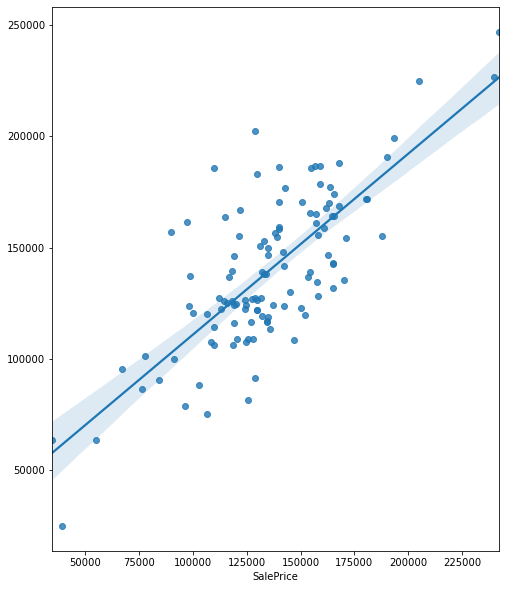

In [228]:
feat_to_keep = ['TotRmsAbvGrd',# 'GarageType', 
                'OverallQual', 
                'GrLivArea',  
                'Neighborhood']

feat_to_keep = ['TotRmsAbvGrd', 'GarageType', 
                'GarageFinish', 'Fireplaces', 'OverallQual', 
                'GrLivArea', 'Heating', 'GarageCars', 
                'Neighborhood']

lr_model(x_feat, keep_, feat_to_keep)

In [190]:
#Backward Elimination
X=pd.read_pickle('data/train_x.pkl')
# [['Neighborhood', 'BedroomAbvGr', 'Heating',
#             'BsmtQual', 'HouseStyle', 'KitchenAbvGr', '1stFlrSF',
#  'TotRmsAbvGrd', 'OverallCond']]
# #X=x_feat
y=pd.read_pickle('data/train_y.pkl')
X = pd.get_dummies(data=X, drop_first=True)
cols = list(X.columns)
pmax = 1
#model = LinearRegression()
#    model.fit(X_train,y_train)
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.215):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotArea_(12799.667, 215245.0]', 'LotArea_(1299.999, 6405.0]', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'OverallQual_10', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallCond_3', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'YearBuilt_(1940.0, 1960.0]', 'YearBuilt_(1960.0, 1973.0]', 'YearBuilt_(1973.0, 1994.0]', 'YearBuilt_(1994.0, 2004.0]', 'YearBuilt_(2004.0, 2010.0]', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_TA

In [ ]:
['BedroomAbvGr', 'KitchenAbvGr', '1stFlrSF', 'TotRmsAbvGrd', 'OverallCond']

In [185]:
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 25)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False  True False
  True False False False False False False False False False False False
  True  True  True False False False  True  True  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False  True
 False False False  True False False False False False False False False
  True False False False False False False False False  True  True False
 False False False False False False False  True  True False False False
 False False False False False False  True False False False False False
  True False False False False  True False False Fa

In [186]:
#no of features
nof_list=np.arange(1,200)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

In [187]:
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 106
Score with 106 features: 0.817928


In [343]:
X=pd.read_pickle('data/train_x.pkl')

y=pd.read_pickle('data/train_y.pkl')
X = pd.get_dummies(data=X, drop_first=True)


from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.005402
Best score using built-in LassoCV: 0.872781


In [344]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 95 variables and eliminated the other 99 variables


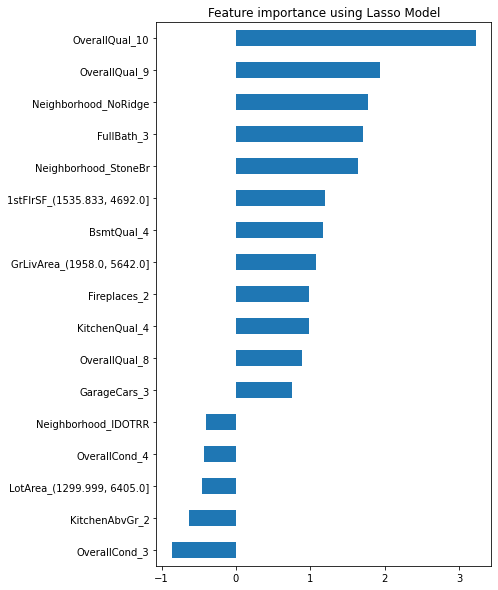

In [361]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 10.0)
imp_coef[-imp_coef.between(-.4,.75)].plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.savefig('images/feature_importance.png')

In [202]:
imp_coef[-imp_coef.between(-.4,.4)]

OverallCond_3                   -0.863766
KitchenAbvGr_2                  -0.627395
LotArea_(1299.999, 6405.0]      -0.452973
OverallCond_4                   -0.435191
Neighborhood_IDOTRR             -0.404772
YearBuilt_(2004.0, 2010.0]       0.408250
1stFlrSF_(1266.0, 1535.833]      0.463771
MSZoning_FV                      0.471278
LotArea_(12799.667, 215245.0]    0.484327
Neighborhood_Crawfor             0.513209
Neighborhood_NridgHt             0.615223
GarageCars_3                     0.753490
OverallQual_8                    0.886955
KitchenQual_4                    0.978506
Fireplaces_2                     0.986028
GrLivArea_(1958.0, 5642.0]       1.074336
BsmtQual_4                       1.167705
1stFlrSF_(1535.833, 4692.0]      1.199284
Neighborhood_StoneBr             1.635543
FullBath_3                       1.702579
Neighborhood_NoRidge             1.771552
OverallQual_9                    1.932685
OverallQual_10                   3.228860
dtype: float64